In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("../Dataset for practice//diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## Bagging

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. 
Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

1.Multiple subsets are created from the original dataset, selecting observations with replacement.<br>
2.A base model (weak model) is created on each of these subsets.<br>
3.The models run in parallel and are independent of each other.<br>
4.The final predictions are determined by combining the predictions from all the models.

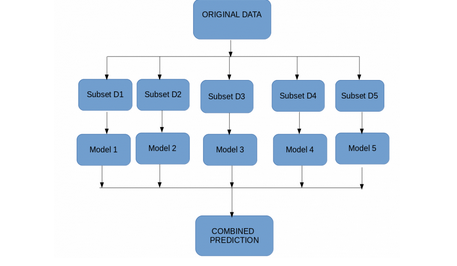

## Bagging Meta Estimator Classifier

Bagging meta-estimator

Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Following are the steps for the bagging meta-estimator algorithm:

    1.Random subsets are created from the original dataset (Bootstrapping).
    2.The subset of the dataset includes all features.
    3.A user-specified base estimator is fitted on each of these smaller sets.
    4.Predictions from each model are combined to get the final result.

#### Parameters used in the  algorithms:

    base_estimator:
        It defines the base estimator to fit on random subsets of the dataset.
        When nothing is specified, the base estimator is a decision tree.
    n_estimators:
        It is the number of base estimators to be created.
        The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.
    max_samples:
        This parameter controls the size of the subsets.
        It is the maximum number of samples to train each base estimator.
    max_features:
        Controls the number of features to draw from the whole dataset.
        It defines the maximum number of features required to train each base estimator.
    n_jobs:
        The number of jobs to run in parallel.
        Set this value equal to the cores in your system.
        If -1, the number of jobs is set to the number of cores.

    random_state:
        It specifies the method of random split. When random state value is same for two models, the random selection is same for both models.
        This parameter is useful when you want to compare different models.


accuracy is : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.69      0.72      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



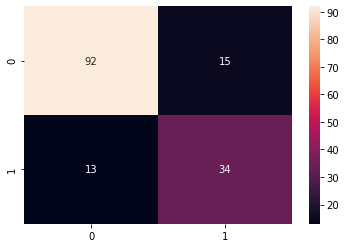

In [8]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model=BaggingClassifier(n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [9]:
#help(BaggingClassifier)

## Implementing The Bagging Classifier with Logistic Model

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

accuracy is : 0.7207792207792207
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       107
           1       0.57      0.36      0.44        47

    accuracy                           0.72       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.70      0.72      0.70       154



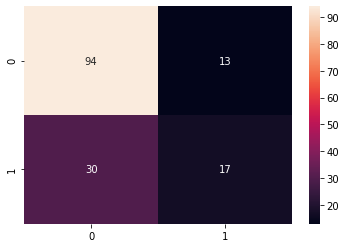

In [10]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
#making the bagging classifier with 100 Logistic Regression models
model=BaggingClassifier(base_estimator=LogisticRegression(solver="sag"),n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## Random Forest Classifier

Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

    1.Random subsets are created from the original dataset (bootstrapping).
    2.At each node in the decision tree, only a random set of features are considered to decide the best split.
    3.A decision tree model is fitted on each of the subsets.
    4.The final prediction is calculated by averaging the predictions from all decision trees.

Note: The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) .

Parameters

    n_estimators:
        It defines the number of decision trees to be created in a random forest.
        Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
    criterion:
        It defines the function that is to be used for splitting.
        The function measures the quality of a split for each feature and chooses the best split.
    max_features :
        It defines the maximum number of features allowed for the split in each decision tree.
        Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
    max_depth:
        Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
    min_samples_split:
        Used to define the minimum number of samples required in a leaf node before a split is attempted.
        If the number of samples is less than the required number, the node is not split.
    min_samples_leaf:
        This defines the minimum number of samples required to be at a leaf node.
        Smaller leaf size makes the model more prone to capturing noise in train data.
    max_leaf_nodes:
        This parameter specifies the maximum number of leaf nodes for each tree.
        The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
    n_jobs:
        This indicates the number of jobs to run in parallel.
        Set value to -1 if you want it to run on all cores in the system.
    random_state:
        This parameter is used to define the random selection.
        It is used for comparison between various models.


accuracy is : 0.8051948051948052
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



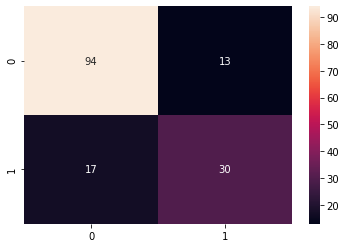

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

## Tuning HyperParameters of Random Forest
The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

    max_features [1 to 20]

Alternately, you could try a suite of different default value calculators.

    max_features in [‘sqrt’, ‘log2’]

Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

    n_estimators in [10, 100, 1000]


In [12]:
#model 
model=RandomForestClassifier()
n_estimators =[10,50,100,1000]
criterion =["gini", "entropy"]
max_features =["auto", "sqrt", "log2"]
#grid
grid=dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
#results
res=grid_cv.fit(xtrain,ytrain)
print("best parameters are :",res.best_params_)
print("best accuracy is :",res.best_score_)

best parameters are : {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
best accuracy is : 0.75246345906082
